<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries and Utilities</h3>


In [37]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import networkx          as nx
import seaborn           as sns
from nltk                import ngrams
from pyvis.network       import Network
import os
import re
import nltk
import pydot

<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">N gram Graph Generator</h3>


In [98]:
class NgramGrapher():
    """
    A class used to transform a corpus given as a numpy array into a graph form of the
    n-gram representation.

    ...

    Attributes
    ----------
    Graph : nx.Graph
        The Graph Representation of The Ngram Input.
    N_nodes : int
        Number of Nodes in Graph.
    N_edges : int
        Number of Edges in Graph.
    In_Max_Deg : int
        Maximum In Degree in Graph.
    Out_Max_Deg : int
        Maximum Out Degree in Graph.
    In_Min_Deg : int
        Minimum In Degree in Graph.
    Out_Min_Deg : int
        Minimum Out Degree in Graph.

    Methods
    -------
    Example_Method(arg=None)
        Add info
    """
    def __init__(self,data,n=2):
        tokenized_text    = ' '.join(data).split()
        ngram             = ngrams(tokenized_text,n=n)
        ngram             = list(ngram)
        
        n_frequencies      = nltk.FreqDist(ngram)
        edges              = list(dict(n_frequencies).keys())
        nodes              = np.unique(np.array(edges).flatten())

        self.Graph = nx.DiGraph()
        self.Graph.add_nodes_from(nodes)
        for x,y in edges:
            self.Graph.add_edge(x,y,value=n_frequencies[(x,y)])        
        
        
        #Graph Attributes
        self.N_nodes       = len(nodes)
        self.N_edges       = len(edges)
        self.In_Max_Deg    = max(dict(self.Graph.in_degree).values())
        self.Out_Max_Deg   = max(dict(self.Graph.out_degree).values())
        self.In_Min_Deg    = min(dict(self.Graph.in_degree).values())
        self.Out_Min_Deg   = min(dict(self.Graph.out_degree).values())
        self.Chromatic_N   = nx.algorithms.coloring.greedy_color(self.Graph)
        
        pos = nx.spiral_layout(self.Graph,resolution =3.5)
        #pos = nx.drawing.nx_pydot.graphviz_layout(self.Graph)
        

    def Viz_Graph(self,notebook=False,height=500,width=900,directed=False):
        nt = Network(f'{height}px', f'{width}px',notebook=notebook,directed=directed)
        nt.set_options(
            'var options = { "physics": {"forceAtlas2Based": {"gravitationalConstant": -230,"springLength": 170,\
              "springConstant": 0,\
              "avoidOverlap": 1\
            },\
            "minVelocity": 0.75,\
            "solver": "forceAtlas2Based",\
            "timestep": 1\
          }\
        }\
        ')
        nt.from_nx(self.Graph)
        #nt.show_buttons(filter_=['physics'])
        nt.prep_notebook()
        return nt.show('nx.html')

    

In [99]:
from wordcloud import STOPWORDS
example_corpus = ''
with open('test.txt', 'r') as f:
    example_corpus = [' '.join([word for word in f.read().split() if word not in STOPWORDS])]
Bigraph = NgramGrapher(example_corpus,2)



In [100]:
c_df = pd.DataFrame([Bigraph.Chromatic_N.values(),Bigraph.Chromatic_N.keys()]).T 
c_df = c_df.rename(columns = {0:'color',1:'word'})
c_df.query('color == 3')

,color,word
125,3,three


<AxesSubplot:>

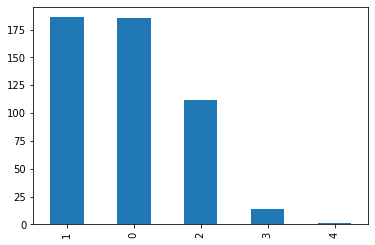

In [43]:
c_df['color'].value_counts().plot(kind='bar')

In [1]:
#Bigraph.Viz_Graph(notebook=True,directed=True)

In [105]:
Bigraph.Graph.out_degree['asked']

2

In [103]:
#['asked']
d = {f'{y}{i}':x for i, (x, y) in enumerate(list(Bigraph.Graph.out_edges()))}
import re
keys = ' '.join(list(d.keys()))
keys = re.findall(r'agent[0-9]*',keys)
keys
print(d['agent716'])

special


<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Graph Attribute Exploration</h3>


<h3 style="background-color:salmon;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Chromatic Number</h3>


<h3 style="background-color:salmon;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Min/Max Degrees</h3>


<h3 style="background-color:salmon;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Hamiltonian Cycles/Paths</h3>


<h3 style="background-color:salmon;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Euler Cycles/Paths</h3>


<h3 style="background-color:salmon;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Max Clique</h3>


<h3 style="background-color:salmon;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Max Independent Set</h3>


<h3 style="background-color:salmon;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Density of Nodes - Regions of High Density</h3>


<h3 style="background-color:salmon;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Design A Clustring Algorithms Based on The Graph</h3>


In [2]:
# Using some arbitrary alpha value we decide how far can we walk from a -
#spesific node in terms of the edge weights using dikstra for example